In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

In [120]:
 import random

In [106]:
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

In [2]:
us_df = pd.read_csv('USvideos.csv')

In [3]:
us_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [4]:
us_df.shape

(40949, 16)

In [5]:
us_df.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1.000000,-0.168231,-0.173921,-0.033547,-0.076307,0.048949,-0.013506,-0.030011
views,-0.168231,1.000000,0.849177,0.472213,0.617621,0.002677,0.015355,-0.002256
likes,-0.173921,0.849177,1.000000,0.447186,0.803057,-0.028918,-0.020888,-0.002641
dislikes,-0.033547,0.472213,0.447186,1.000000,0.700184,-0.004431,-0.008230,-0.001853
comment_count,-0.076307,0.617621,0.803057,0.700184,1.000000,-0.028277,-0.013819,-0.003725
comments_disabled,0.048949,0.002677,-0.028918,-0.004431,-0.028277,1.000000,0.319230,-0.002970
ratings_disabled,-0.013506,0.015355,-0.020888,-0.008230,-0.013819,0.319230,1.000000,-0.001526
video_error_or_removed,-0.030011,-0.002256,-0.002641,-0.001853,-0.003725,-0.002970,-0.001526,1.000000


In [6]:
us_df[us_df['video_error_or_removed'] == True].shape

(23, 16)

In [7]:
us_df = us_df[us_df['video_error_or_removed'] == False]
del us_df['video_error_or_removed']

In [8]:
with open('US_category_id.json') as f:
    category_data = json.load(f)

In [9]:
category_data 

{'kind': 'youtube#videoCategoryListResponse',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM"',
 'items': [{'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdnt

In [10]:
category_name_map = {}
for category in category_data['items']:
    cid = int(category['id'])
    category_name_map[cid] = category['snippet']['title']

In [11]:
category_name_map

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [12]:
us_df['category_name'] = us_df['category_id'].apply(lambda cid : category_name_map[cid])

In [13]:
us_df.head(20)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,I know it's been a while since we did this sho...,Entertainment
5,gHZ1Qz0KiKM,17.14.11,2 Weeks with iPhone X,iJustine,28,2017-11-13T19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,Using the iPhone for the past two weeks -- her...,Science & Technology
6,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,2017-11-12T05:37:17.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,Embattled Alabama Senate candidate Roy Moore (...,Entertainment
7,nc99ccSXST0,17.14.11,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,28,2017-11-12T21:50:37.000Z,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732,23663,778,3432,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,False,False,Ice Cream Pint Combination Lock - http://amzn....,Science & Technology
8,jr9QtXwC9vc,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,1,2017-11-13T14:00:23.000Z,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,"Inspired by the imagination of P.T. Barnum, Th...",Film & Animation
9,TUmyygCMMGA,17.14.11,Why the rise of the robots won’t mean the end ...,Vox,25,2017-11-13T13:45:16.000Z,"vox.com|""vox""|""explain""|""shift change""|""future...",256426,12654,1363,2368,https://i.ytimg.com/vi/TUmyygCMMGA/default.jpg,False,False,"For now, at least, we have better things to wo...",News & Politics


In [14]:
pd.to_datetime(us_df['publish_time'])

0       2017-11-13 17:13:01+00:00
1       2017-11-13 07:30:00+00:00
2       2017-11-12 19:05:24+00:00
3       2017-11-13 11:00:04+00:00
4       2017-11-12 18:01:41+00:00
5       2017-11-13 19:07:23+00:00
6       2017-11-12 05:37:17+00:00
7       2017-11-12 21:50:37+00:00
8       2017-11-13 14:00:23+00:00
9       2017-11-13 13:45:16+00:00
10      2017-11-13 02:05:26+00:00
11      2017-11-13 03:00:00+00:00
12      2017-11-13 17:00:00+00:00
13      2017-11-12 14:00:00+00:00
14      2017-11-12 18:30:01+00:00
15      2017-11-13 20:09:58+00:00
16      2017-11-12 17:00:05+00:00
17      2017-11-13 16:00:07+00:00
18      2017-11-13 15:30:17+00:00
19      2017-11-12 22:00:01+00:00
20      2017-11-13 14:00:03+00:00
21      2017-11-12 15:00:01+00:00
22      2017-11-13 16:00:03+00:00
23      2017-11-12 16:00:01+00:00
24      2017-11-13 14:44:24+00:00
25      2017-11-12 14:00:04+00:00
26      2017-11-13 12:13:36+00:00
27      2017-11-13 16:00:03+00:00
28      2017-11-13 15:42:28+00:00
29      2011-0

In [15]:
us_df['publish_time'] = us_df['publish_time'].apply(lambda x : x[:10])
us_df['publish_time'] = pd.to_datetime(us_df['publish_time'])

In [16]:
us_df['trending_date'] = '20' + us_df['trending_date']
us_df['trending_date'] = pd.to_datetime(us_df['trending_date'], format="%Y.%d.%m")

In [17]:
us_df.dtypes

video_id                     object
trending_date        datetime64[ns]
title                        object
channel_title                object
category_id                   int64
publish_time         datetime64[ns]
tags                         object
views                         int64
likes                         int64
dislikes                      int64
comment_count                 int64
thumbnail_link               object
comments_disabled              bool
ratings_disabled               bool
description                  object
category_name                object
dtype: object

In [18]:
us_df.dtypes

video_id                     object
trending_date        datetime64[ns]
title                        object
channel_title                object
category_id                   int64
publish_time         datetime64[ns]
tags                         object
views                         int64
likes                         int64
dislikes                      int64
comment_count                 int64
thumbnail_link               object
comments_disabled              bool
ratings_disabled               bool
description                  object
category_name                object
dtype: object

In [19]:
us_df['trending_date'] - us_df['publish_time']

0          1 days
1          1 days
2          2 days
3          1 days
4          2 days
5          1 days
6          2 days
7          2 days
8          1 days
9          1 days
10         1 days
11         1 days
12         1 days
13         2 days
14         2 days
15         1 days
16         2 days
17         1 days
18         1 days
19         2 days
20         1 days
21         2 days
22         1 days
23         2 days
24         1 days
25         2 days
26         1 days
27         1 days
28         1 days
29      2361 days
           ...   
40919     21 days
40920     22 days
40921     21 days
40922     21 days
40923     22 days
40924     22 days
40925     24 days
40926     23 days
40927     23 days
40928     23 days
40929     23 days
40930     23 days
40931     24 days
40932     23 days
40933     25 days
40934     25 days
40935     25 days
40936     25 days
40937     26 days
40938     27 days
40939     27 days
40940     27 days
40941     27 days
40942     27 days
40943     

In [20]:
us_df['days_to_trend'] = us_df['trending_date'] - us_df['publish_time']

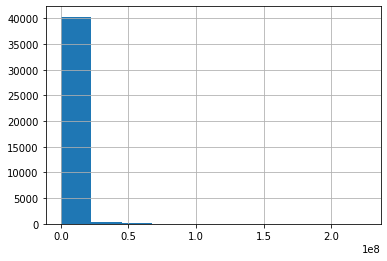

In [21]:
us_df['views'].hist()

In [22]:
million_df = us_df[us_df['views'] < 1e6]

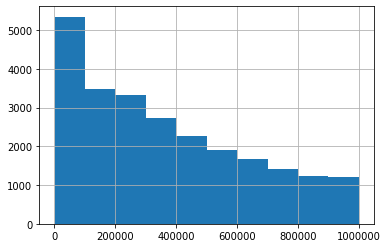

In [23]:
million_df['views'].hist()

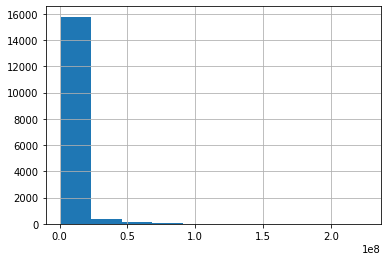

In [24]:
more_df = us_df[us_df['views'] > 1e6]
more_df['views'].hist()

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


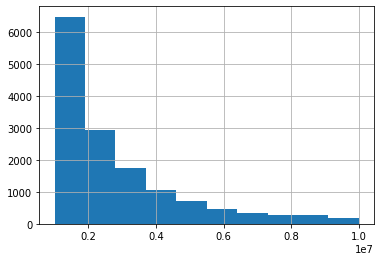

In [25]:
tens_millions_df = us_df[us_df['views'] > 1e6][us_df['views'] < 1e7]
tens_millions_df['views'].hist()

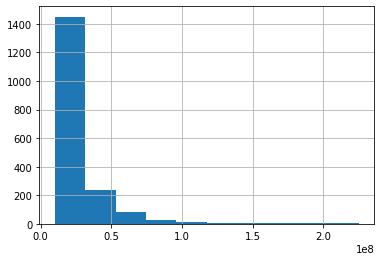

In [26]:
hundred_millions_df =  us_df[us_df['views'] > 1e7]
hundred_millions_df['views'].hist()

In [27]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False

In [28]:
us_df["contains_capitalized"] = us_df["title"].apply(contains_capitalized_word)

In [29]:
value_counts = us_df["contains_capitalized"].value_counts().to_dict()

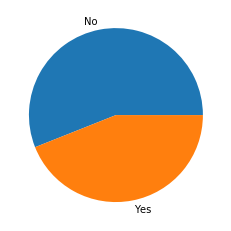

In [30]:
plt.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'])
plt.show()

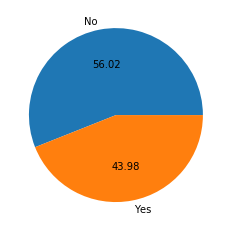

In [31]:
plt.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], autopct='%.2f')
plt.show()

In [32]:
us_df["title_length"] = us_df["title"].apply(lambda x: len(x.split()))

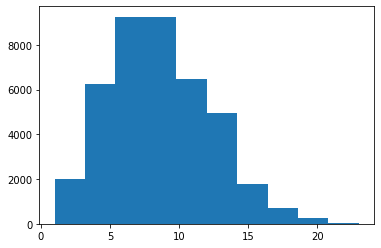

In [33]:
plt.hist(us_df['title_length'])
plt.show()

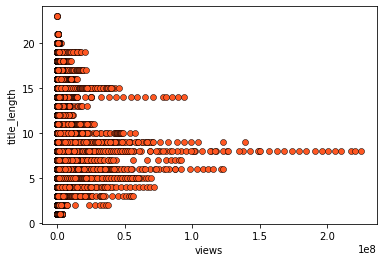

In [34]:
plt.scatter(x=us_df['views'], y=us_df['title_length'], color="#FF5722", edgecolors="#000000", linewidths=0.5)
plt.xlabel("views")
plt.ylabel("title_length")
plt.show()

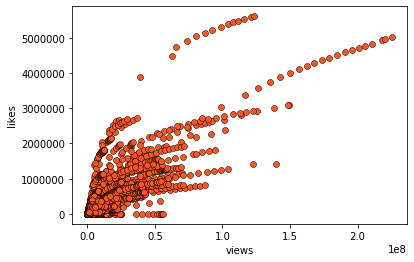

In [35]:
plt.scatter(x=us_df['views'], y=us_df['likes'], color="#FF5722", edgecolors="#000000", linewidths=0.5)
plt.xlabel("views")
plt.ylabel("likes")
plt.show()

In [36]:
from wordcloud import WordCloud, STOPWORDS

In [37]:
stopwords = set(STOPWORDS)
stopwords.update(["Video", "Official"])

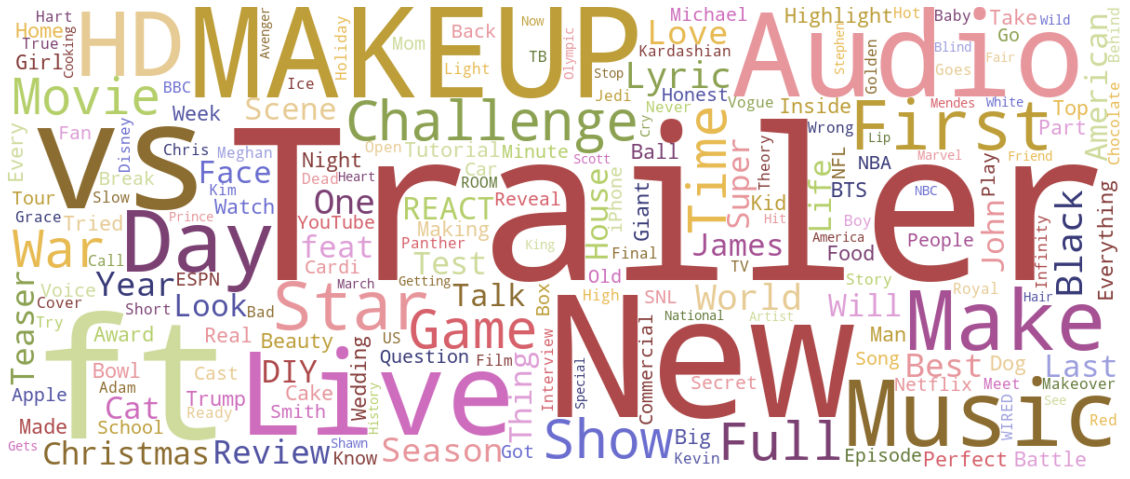

In [38]:
wc = WordCloud(width=1200, height=500, stopwords=stopwords,
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(us_df["title"]))
plt.figure(figsize=(20,15))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

In [39]:
channel_df = us_df[['channel_title', 'video_id']].groupby("channel_title").count()

In [40]:
channel_df = channel_df.rename(columns= {'video_id': 'video_count'})
channel_df = channel_df.sort_values(by='video_count', ascending=False)

In [41]:
channel_df.head(20)

,video_count
channel_title,
ESPN,203
The Tonight Show Starring Jimmy Fallon,197
TheEllenShow,193
Netflix,193
Vox,193
The Late Show with Stephen Colbert,187
Jimmy Kimmel Live,186
Late Night with Seth Meyers,183
Screen Junkies,182


In [42]:
channel_views_df = us_df[['channel_title', 'views']].groupby("channel_title").sum()
channel_views_df = channel_views_df.sort_values(by='views', ascending=False)
channel_views_df.head(20)

,views
channel_title,
ChildishGambinoVEVO,3758488765
ibighit,2235906679
Dude Perfect,1870085178
Marvel Entertainment,1808998971
ArianaGrandeVevo,1576959172
MalumaVEVO,1551515831
jypentertainment,1486972132
Sony Pictures Entertainment,1432374398
FoxStarHindi,1238609854


In [43]:
category_df = us_df[['category_name', 'video_id']].groupby("category_name").count()
category_df = category_df.rename(columns= {'video_id': 'video_count'})
category_df = category_df.sort_values(by='video_count', ascending=False)
category_df.head(20)

,video_count
category_name,
Entertainment,9956
Music,6472
Howto & Style,4146
Comedy,3457
People & Blogs,3210
News & Politics,2487
Science & Technology,2401
Film & Animation,2332
Sports,2172


In [44]:
category_views_df = us_df[['category_name', 'views']].groupby("category_name").sum()
category_views_df = category_views_df.sort_values(by='views', ascending=False)
category_views_df.head(20)

,views
category_name,
Music,40132892190
Entertainment,20597267426
Film & Animation,7253169649
Comedy,5117426208
People & Blogs,4917191726
Sports,4404451442
Howto & Style,4078545064
Science & Technology,3487756816
Gaming,2141218625


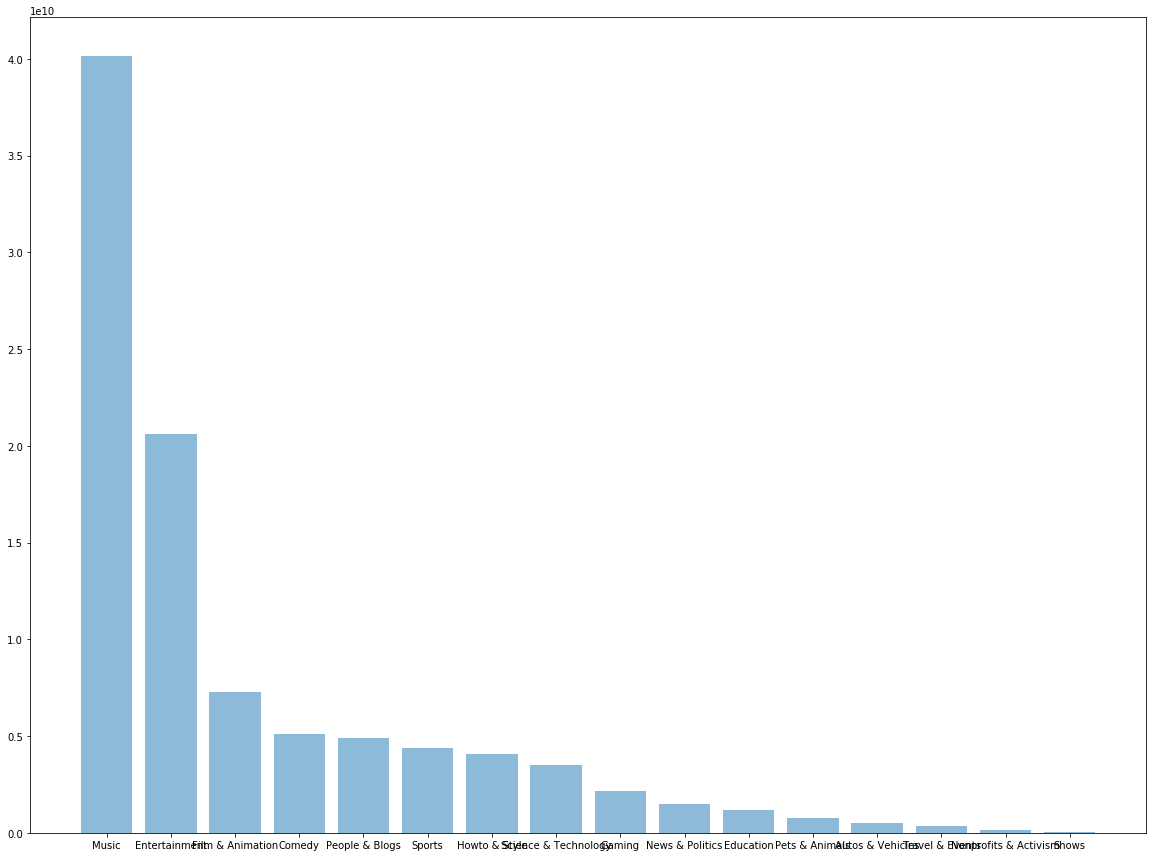

In [45]:
plt.figure(figsize=(20,15))
plt.bar(category_views_df.index, category_views_df['views'], align='center', alpha=0.5)
plt.show()

In [46]:
us_df['publish_time'].apply(lambda x: x.strftime('%a'))

0        Mon
1        Mon
2        Sun
3        Mon
4        Sun
5        Mon
6        Sun
7        Sun
8        Mon
9        Mon
10       Mon
11       Mon
12       Mon
13       Sun
14       Sun
15       Mon
16       Sun
17       Mon
18       Mon
19       Sun
20       Mon
21       Sun
22       Mon
23       Sun
24       Mon
25       Sun
26       Mon
27       Mon
28       Mon
29       Sun
        ... 
40919    Thu
40920    Wed
40921    Thu
40922    Thu
40923    Wed
40924    Wed
40925    Mon
40926    Tue
40927    Tue
40928    Tue
40929    Tue
40930    Tue
40931    Mon
40932    Tue
40933    Sun
40934    Sun
40935    Sun
40936    Sun
40937    Sat
40938    Fri
40939    Fri
40940    Fri
40941    Fri
40942    Fri
40943    Fri
40944    Fri
40945    Fri
40946    Fri
40947    Thu
40948    Thu
Name: publish_time, Length: 40926, dtype: object

In [47]:
us_df['publish_day'] = us_df['publish_time'].apply(lambda x: x.strftime('%a'))

In [48]:
us_df["publish_day"].value_counts()

Fri    7002
Thu    6949
Tue    6786
Wed    6755
Mon    6176
Sun    3679
Sat    3579
Name: publish_day, dtype: int64

In [49]:
science_df = us_df[us_df['category_name'] == 'Science & Technology']

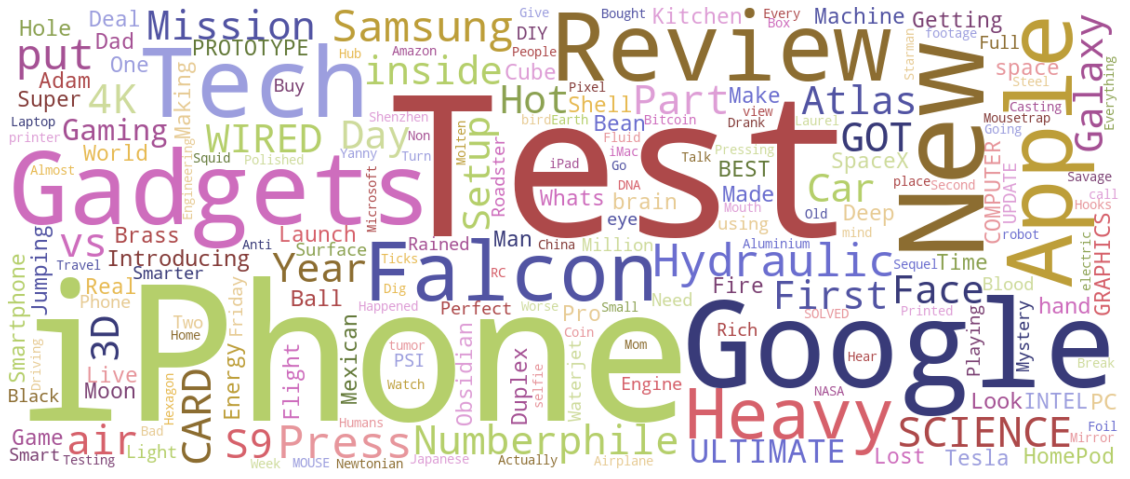

In [50]:
wc = WordCloud(width=1200, height=500, stopwords=stopwords,
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(science_df["title"]))
plt.figure(figsize=(20,15))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [52]:
vectorizer = TfidfVectorizer()

In [53]:
title_data = vectorizer.fit_transform(us_df['title'])
categorys = us_df['category_id']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(title_data, categorys, test_size=0.2, random_state=42)

In [55]:
clf = RandomForestClassifier(n_estimators=500, max_depth=50, random_state=0)

In [56]:
clf.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=50, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [57]:
clf.score(X_test, y_test)

0.6221597849987784

In [58]:
clf = RandomForestClassifier(n_estimators=150, max_depth=120, random_state=0)

In [59]:
clf.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=120, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [60]:
clf.score(X_test, y_test)

0.8209137551917909

In [61]:
clf.predict_proba(X_test)

array([[3.29719143e-02, 1.12877512e-02, 8.66374355e-02, ...,
        6.67523145e-02, 1.94441904e-03, 8.92663067e-04],
       [1.39747720e-02, 5.14996894e-03, 6.12708250e-01, ...,
        3.16953375e-02, 9.04095191e-04, 3.79303143e-04],
       [3.40586521e-02, 1.18119684e-02, 8.74774014e-02, ...,
        7.79050615e-02, 2.04139739e-03, 9.85247370e-04],
       ...,
       [2.23190523e-02, 7.79836886e-03, 5.85040768e-02, ...,
        5.17432476e-02, 1.34712008e-03, 6.39367445e-04],
       [3.63054972e-02, 1.25424135e-02, 9.40689710e-02, ...,
        7.41069040e-02, 2.15547071e-03, 1.00520677e-03],
       [2.10589881e-02, 7.10213892e-03, 4.96650977e-01, ...,
        4.31422170e-02, 1.26068065e-03, 6.05284104e-04]])

In [62]:
from sklearn.svm import SVC

In [63]:
clf = SVC(gamma='auto', kernel ='rbf')

In [64]:
clf.fit(X_train, y_train) 
clf.score(X_test, y_test)

0.24749572440752504

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')

In [67]:
clf.fit(X_train, y_train) 
clf.score(X_test, y_test)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9425849010505741

In [68]:
title_data = vectorizer.fit_transform(us_df['title'])

In [69]:
new_title_data = np.insert(title_data.toarray(), 0, values=us_df['category_id'].values, axis=1)

MemoryError: 

In [70]:
new_title_data

NameError: name 'new_title_data' is not defined

In [71]:
days_result = us_df['days_to_trend'].apply(lambda x : x.days)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(new_title_data, days_result, test_size=0.2, random_state=42)

NameError: name 'new_title_data' is not defined

In [73]:
from sklearn.svm import SVR

In [74]:
model = SVR(gamma='scale', C=1.0, epsilon=0.2)

In [75]:
us_df['days_to_trend'].apply(lambda x : x.days)

0           1
1           1
2           2
3           1
4           2
5           1
6           2
7           2
8           1
9           1
10          1
11          1
12          1
13          2
14          2
15          1
16          2
17          1
18          1
19          2
20          1
21          2
22          1
23          2
24          1
25          2
26          1
27          1
28          1
29       2361
         ... 
40919      21
40920      22
40921      21
40922      21
40923      22
40924      22
40925      24
40926      23
40927      23
40928      23
40929      23
40930      23
40931      24
40932      23
40933      25
40934      25
40935      25
40936      25
40937      26
40938      27
40939      27
40940      27
40941      27
40942      27
40943      27
40944      27
40945      27
40946      27
40947      28
40948      28
Name: days_to_trend, Length: 40926, dtype: int64

In [76]:
us_df['days_count'] = us_df['days_to_trend'].apply(lambda x : x.days)

In [77]:
us_df.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,contains_capitalized,title_length,days_count
category_id,1.000000,-0.168393,-0.174096,-0.033633,-0.076489,0.048910,-0.013566,0.064157,0.021341,-0.028703
views,-0.168393,1.000000,0.849167,0.472219,0.617627,0.002670,0.015352,-0.025495,-0.035583,-0.014428
likes,-0.174096,0.849167,1.000000,0.447192,0.803070,-0.028927,-0.020893,-0.003007,-0.074678,-0.017653
dislikes,-0.033633,0.472219,0.447192,1.000000,0.700183,-0.004437,-0.008233,-0.021716,-0.031806,-0.007057
comment_count,-0.076489,0.617627,0.803070,0.700183,1.000000,-0.028289,-0.013825,0.019751,-0.071682,-0.013258
comments_disabled,0.048910,0.002670,-0.028927,-0.004437,-0.028289,1.000000,0.319227,0.009014,0.024421,-0.002160
ratings_disabled,-0.013566,0.015352,-0.020893,-0.008233,-0.013825,0.319227,1.000000,0.000515,-0.001071,0.003200
contains_capitalized,0.064157,-0.025495,-0.003007,-0.021716,0.019751,0.009014,0.000515,1.000000,0.181234,-0.014279
title_length,0.021341,-0.035583,-0.074678,-0.031806,-0.071682,0.024421,-0.001071,0.181234,1.000000,-0.053148
days_count,-0.028703,-0.014428,-0.017653,-0.007057,-0.013258,-0.002160,0.003200,-0.014279,-0.053148,1.000000


In [78]:
import seaborn as sns

In [79]:
category_days_count_df = us_df.groupby(['category_name','days_count']).count()['video_id']

In [80]:
category_days_count_df = category_days_count_df.unstack()

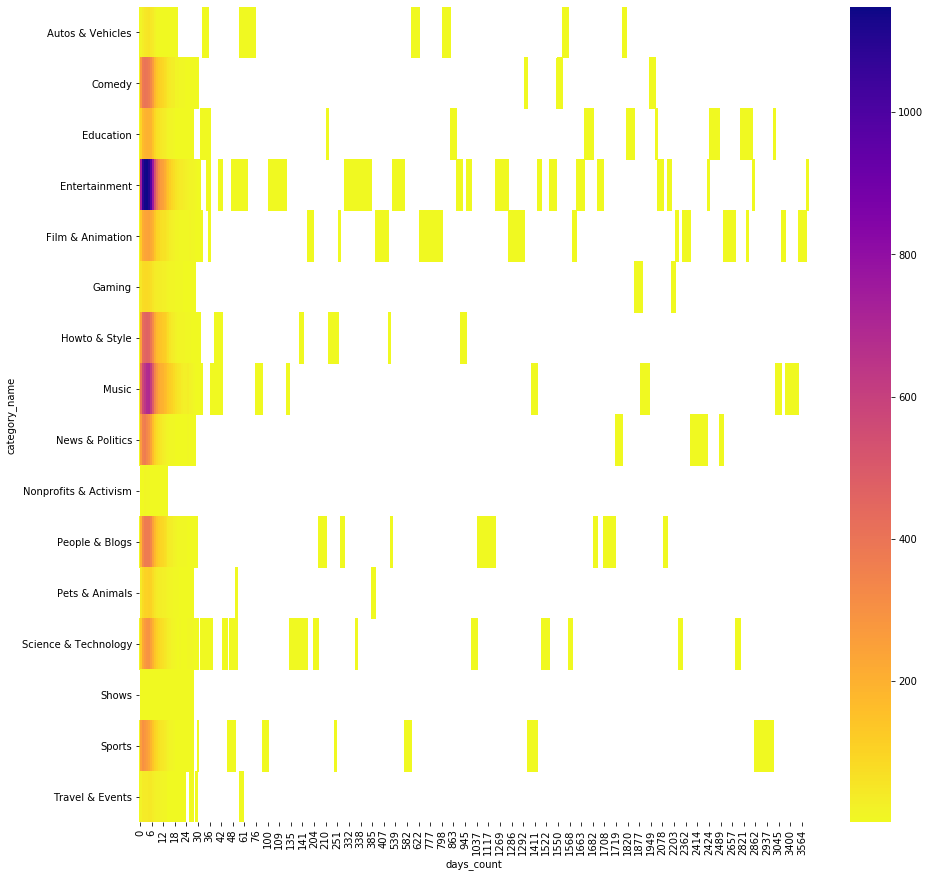

In [81]:
plt.figure(figsize=(15,15))
sns.heatmap(category_days_count_df, cmap='plasma_r')

In [82]:
likes_df = us_df[['category_name', 'likes', 'dislikes']].groupby(by='category_name', as_index=False).sum()


In [83]:
likes_df['ratio'] = likes_df['likes'] / likes_df['dislikes']

In [84]:
likes_df = likes_df.sort_values(by='ratio', ascending=False)

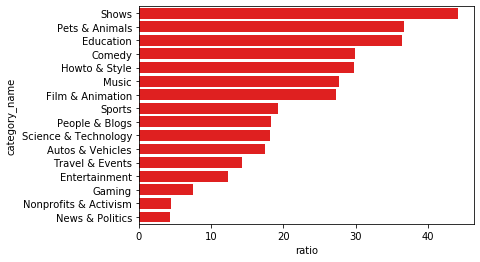

In [85]:
sns.barplot(x="ratio", y="category_name", data=likes_df,
            label="Likes-Dislikes Ratio", color="r")

In [86]:
nltk.data.path

NameError: name 'nltk' is not defined

In [87]:
import nltk
import re
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize

In [88]:
def preprocess(text):
    text = re.sub('[^A-Za-z]+', ' ', text)
    word_tokens = word_tokenize(text)
    en_stopwords = set(stopwords.words('english'))
    
    remove_stopwords = [w for w in word_tokens if not w in en_stopwords]
    
    without_single_characters = [word for word in remove_stopwords if len(word) > 2]
    no_numbers = [word for word in without_single_characters if not word.isdigit()]
    
    return no_numbers

In [89]:
preprocess('last week tonight trump presidency|"last week tonight donald trump"|"john oliver trump"|"donald trump"')

['last',
 'week',
 'tonight',
 'trump',
 'presidency',
 'last',
 'week',
 'tonight',
 'donald',
 'trump',
 'john',
 'oliver',
 'trump',
 'donald',
 'trump']

In [90]:
SentimentIntensityAnalyzer().polarity_scores('presidency')['compound']

0.0

In [91]:
category_list = us_df['category_name'].unique()
category_list

array(['People & Blogs', 'Entertainment', 'Comedy',
       'Science & Technology', 'Film & Animation', 'News & Politics',
       'Sports', 'Music', 'Pets & Animals', 'Education', 'Howto & Style',
       'Autos & Vehicles', 'Travel & Events', 'Gaming',
       'Nonprofits & Activism', 'Shows'], dtype=object)

In [92]:
tags_word = us_df[us_df['category_name'] == 'News & Politics']['tags'].str.lower().str.cat(sep=' ')

In [93]:
tags_words = preprocess(tags_word)

In [94]:
word_dist = nltk.FreqDist(tags_words)

In [95]:
words = word_dist.most_common(1000)

In [96]:
words

[('news', 3440),
 ('video', 770),
 ('today', 705),
 ('trump', 599),
 ('show', 490),
 ('world', 449),
 ('politics', 428),
 ('royal', 428),
 ('vox', 411),
 ('nbc', 411),
 ('volcano', 400),
 ('live', 397),
 ('time', 375),
 ('breaking', 370),
 ('donald', 350),
 ('shooting', 349),
 ('school', 347),
 ('new', 335),
 ('olympics', 320),
 ('com', 312),
 ('health', 303),
 ('times', 300),
 ('sexual', 297),
 ('wedding', 297),
 ('interview', 284),
 ('washington', 283),
 ('latest', 268),
 ('hawaii', 263),
 ('eruption', 261),
 ('cbs', 258),
 ('hoda', 252),
 ('prince', 245),
 ('meghan', 242),
 ('train', 240),
 ('bbc', 237),
 ('york', 236),
 ('business', 231),
 ('magazine', 228),
 ('cnn', 223),
 ('amtrak', 217),
 ('john', 213),
 ('graham', 213),
 ('harry', 210),
 ('president', 202),
 ('markle', 202),
 ('youtube', 202),
 ('billy', 202),
 ('happening', 200),
 ('nassar', 199),
 ('korea', 198),
 ('kim', 198),
 ('explain', 193),
 ('music', 191),
 ('house', 188),
 ('super', 188),
 ('post', 186),
 ('current', 

In [97]:
polarity = 0.0
for word_tuple in words:
    word = word_tuple[0]
    polarity += SentimentIntensityAnalyzer().polarity_scores(word)['compound']
print(polarity)

-1.5716999999999972


In [98]:
polaritys = []
for category in category_list:
    tags_word = us_df[us_df['category_name'] == category]['tags'].str.lower().str.cat(sep=' ')

    tags_words = preprocess(tags_word)
    word_dist = nltk.FreqDist(tags_words)
    words = word_dist.most_common(1000)
    
    polarity = 0.0
    for word_tuple in words:
        word = word_tuple[0]
        polarity += SentimentIntensityAnalyzer().polarity_scores(word)['compound']
    
    polaritys.append(polarity)

Text(0.5, 1.0, 'Polarity of Categories in Youtube videos')

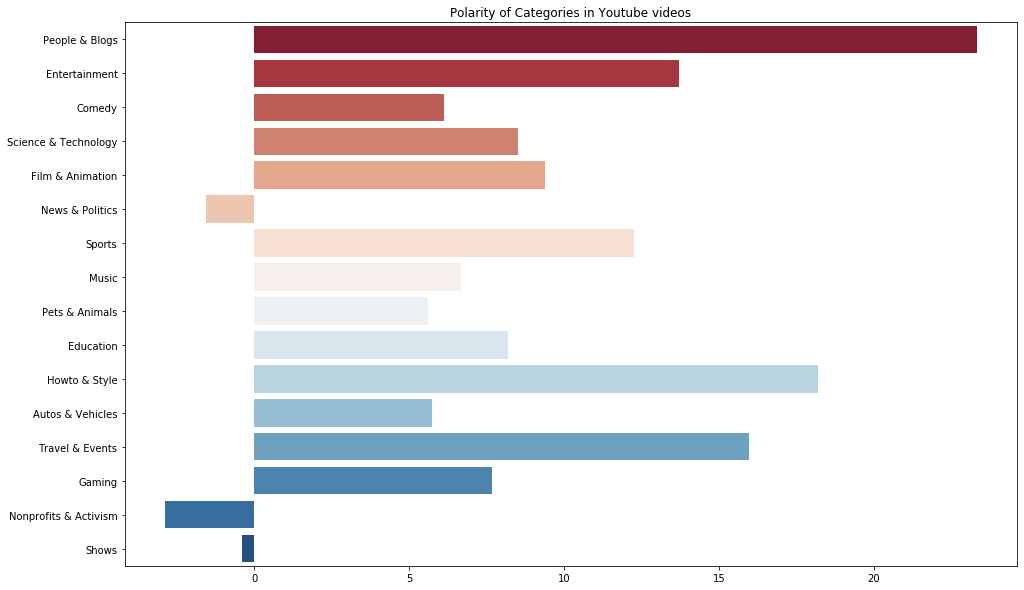

In [99]:
plt.figure(figsize=(16,10))
ax = sns.barplot(x=polaritys,y=category_list, palette="RdBu")
plt.title("Polarity of Categories in Youtube videos")

In [100]:
tags_word = us_df[us_df['category_name'] == 'News & Politics']['tags'].str.lower().str.cat(sep=' ')

tags_words = preprocess(tags_word)
word_dist = nltk.FreqDist(tags_words)
words = word_dist.most_common(1000)

polarity_pairs = []
for word_tuple in words:
    word = word_tuple[0]
    polarity = SentimentIntensityAnalyzer().polarity_scores(word)['compound']
    polarity_pairs.append((word, polarity))
polarity_pairs.sort(key=lambda x : x[1], reverse=False)

polarity_pairs[:10]

[('murder', -0.6908),
 ('dead', -0.6486),
 ('abuse', -0.6369),
 ('violence', -0.6249),
 ('disaster', -0.6249),
 ('crisis', -0.6249),
 ('racism', -0.6249),
 ('bullying', -0.5994),
 ('war', -0.5994),
 ('death', -0.5994)]

In [101]:
for category in category_list:
    tags_word = us_df[us_df['category_name'] == category]['tags'].str.lower().str.cat(sep=' ')

    tags_words = preprocess(tags_word)
    word_dist = nltk.FreqDist(tags_words)
    words = word_dist.most_common(1000)

    polarity_pairs = []
    for word_tuple in words:
        word = word_tuple[0]
        polarity = SentimentIntensityAnalyzer().polarity_scores(word)['compound']
        polarity_pairs.append((word, polarity))
    polarity_pairs.sort(key=lambda x : x[1], reverse=False)

    print(category)
    print(polarity_pairs[:10])
    print()

People & Blogs
[('war', -0.5994), ('death', -0.5994), ('depression', -0.5719), ('rage', -0.5574), ('fail', -0.5423), ('bad', -0.5423), ('ugly', -0.5106), ('fake', -0.4767), ('savage', -0.4588), ('block', -0.4404)]

Entertainment
[('hell', -0.6808), ('disaster', -0.6249), ('war', -0.5994), ('death', -0.5994), ('horror', -0.5719), ('wars', -0.5574), ('crime', -0.5423), ('fail', -0.5423), ('hurt', -0.5267), ('prison', -0.5106)]

Comedy
[('hell', -0.6808), ('cancer', -0.6597), ('dead', -0.6486), ('worst', -0.6249), ('racist', -0.6124), ('war', -0.5994), ('death', -0.5994), ('wtf', -0.5859), ('wars', -0.5574), ('bad', -0.5423)]

Science & Technology
[('war', -0.5994), ('scam', -0.5719), ('crappy', -0.5574), ('shitty', -0.5574), ('destroy', -0.5423), ('bad', -0.5423), ('fail', -0.5423), ('dumb', -0.5106), ('worse', -0.4767), ('wrong', -0.4767)]

Film & Animation
[('evil', -0.6597), ('dead', -0.6486), ('disaster', -0.6249), ('war', -0.5994), ('death', -0.5994), ('horror', -0.5719), ('scam', -

In [102]:
!python -m spacy download en_core_web_sm

  Stored in directory: C:\Users\ADMINI~1\AppData\Local\Temp\pip-ephem-wheel-cache-y07qp08i\wheels\6a\47\fb\6b5a0b8906d8e8779246c67d4658fd8a544d4a03a75520197a
Successfully built en-core-web-sm
[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [103]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [104]:
preprocess('')

[]

In [107]:
trending_titles = us_df['title'].progress_apply(lambda x : ' '.join(preprocess(x)))

In [108]:
def word_generator(text):
    word = list(text.split())
    return word
def bigram_generator(text):
    bgram = list(nltk.bigrams(text.split()))
    bgram = [' '.join((a, b)) for (a, b) in bgram]
    return bgram
def trigram_generator(text):
    tgram = list(nltk.trigrams(text.split()))
    tgram = [' '.join((a, b, c)) for (a, b, c) in tgram]
    return tgram

In [109]:
words = us_df['title'].progress_apply(word_generator)
bigrams = us_df['title'].progress_apply(bigram_generator)
trigrams = us_df['title'].progress_apply(trigram_generator)

In [110]:
trigrams

0        [WE WANT TO, WANT TO TALK, TO TALK ABOUT, TALK...
1        [The Trump Presidency:, Trump Presidency: Last...
2        [Racist Superman |, Superman | Rudy, | Rudy Ma...
3        [Nickelback Lyrics: Real, Lyrics: Real or, Rea...
4        [I Dare You:, Dare You: GOING, You: GOING BALD!?]
5         [2 Weeks with, Weeks with iPhone, with iPhone X]
6        [Roy Moore &, Moore & Jeff, & Jeff Sessions, J...
7        [5 Ice Cream, Ice Cream Gadgets, Cream Gadgets...
8        [The Greatest Showman, Greatest Showman |, Sho...
9        [Why the rise, the rise of, rise of the, of th...
10       [Dion Lewis' 103-Yd, Lewis' 103-Yd Kick, 103-Y...
11       [(SPOILERS) 'Shiva Saves, 'Shiva Saves the, Sa...
12       [Marshmello - Blocks, - Blocks (Official, Bloc...
13       [Which Countries Are, Countries Are About, Are...
14                     [SHOPPING FOR NEW, FOR NEW FISH!!!]
15                                      [The New SpotMini]
16       [One Change That, Change That Would, That Woul.

In [111]:
from collections import Counter, defaultdict

In [112]:
language_model = defaultdict(lambda: defaultdict(lambda: 0))

In [113]:
for trigram in trigrams:
    for tokens in trigram:
        w1, w2, w3 = tokens.split()
        language_model[(w1, w2)][w3] += 1

In [116]:
for w1_w2 in language_model:
    total_count = float(sum(language_model[w1_w2].values()))
    
    for w3 in language_model[w1_w2]:
        language_model[w1_w2][w3] /= total_count

In [117]:
language_model['That', 'Time']

defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
            {'a': 0.2222222222222222, 'It': 0.7777777777777778})

In [ ]:
# starting words
result_words = ["US", "government"]

length_limit = 8

sentence_finished = False
while not sentence_finished:
    r = random.random()
    accumulator = .0

    for word in language_model[tuple(result_words[-2:])].keys():
        accumulator += language_model[tuple(result_words[-2:])][word]
        
        # select words that are above the probability threshold
        if accumulator >= r:
            result_words.append(word)
            break

    if result_words[-2:] == [None, None] or len(result_words) > length_limit:
        sentence_finished = True
 
print(' '.join([word for word in result_words if word]))